# EDA para documentos en el reconomiento de variables para automatización


## 1. Preparación

### 1.1. Instalación de dependencias

In [1]:
%pip install PyPDF2
%pip install pandas
%pip install seaborn
%pip install WordCloud
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\rafap\Documents\Rafa\UTESM\UltimoTrimestre\Proyecto integrador\Repository\.env\Scripts\python.exe -m pip install --upgrade pip' command.


### 1.2. Importación de librerias

In [2]:
import PyPDF2
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

### 1.3. Extracción de datos PDFs a Dataframe

In [3]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

In [5]:
# Directorio con tus PDFs
pdf_folder = "datos"
data = []

for filename in os.listdir(pdf_folder):
    if filename.lower().endswith('.pdf'):
        file_path = os.path.join(pdf_folder, filename)
        text = extract_text_from_pdf(file_path)
        # Aquí podrías aplicar algún procesamiento adicional para extraer campos específicos usando regex, NLP, etc.
        data.append({
            "filename": filename,
            "text": text,
            "num_caracteres": len(text)
        })

# Convertir la lista de diccionarios a DataFrame
df = pd.DataFrame(data)
print(df.head())


                                            filename  \
0  0035_FNA_FSW_011_2024_Técnico.NetMobile_WI_202...   
1  0045_FNA_FSW_011_2024_Técnico.NetMobile_WI_209...   
2  0046_FNA_FSW_011_2024_Correctivos 209029_21091...   
3  0049_FNA_FSW_011_2024_CapacitacionLegalizadora...   
4  0051_FNA_FSW_011_2024_CapacitacionDENUNCIAS_RF...   

                                                text  num_caracteres  
0   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-\...            8071  
1   FORMATO ACTA DE REUNIÓN  Código  \nGE-GP-FO-\...            4557  
2                                                                  0  
3   \n \n \nFORMATO  ACTA  DE REUNIÓN  Código  \n...            4890  
4   \n  \nFORMATO  ACTA  DE REUNIÓN  Código  \nGE...            4989  


## 2. Aplicación del EDA


### 2.1. Análisis general del dataframe

In [6]:
# Información básica
print(df.info())

# Estadísticas descriptivas (en este caso, por ejemplo, la longitud del texto)
print(df['num_caracteres'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   filename        26 non-null     object
 1   text            26 non-null     object
 2   num_caracteres  26 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 752.0+ bytes
None
count       26.000000
mean      7762.307692
std       4604.453981
min          0.000000
25%       5080.000000
50%       7466.000000
75%       9301.000000
max      21138.000000
Name: num_caracteres, dtype: float64


### 2.2. Detección de Valores Faltantes

filename          0
text              0
num_caracteres    0
dtype: int64


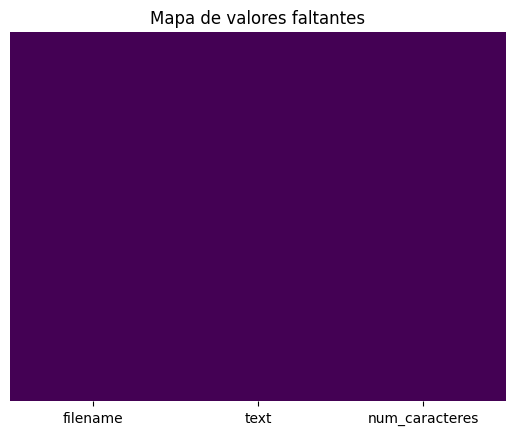

In [7]:
# Verificar si hay valores nulos
print(df.isnull().sum())

# Visualización de valores faltantes (opcional, con seaborn o matplotlib)

sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Mapa de valores faltantes")
plt.show()


### 2.3. Análisis de Distribuciones

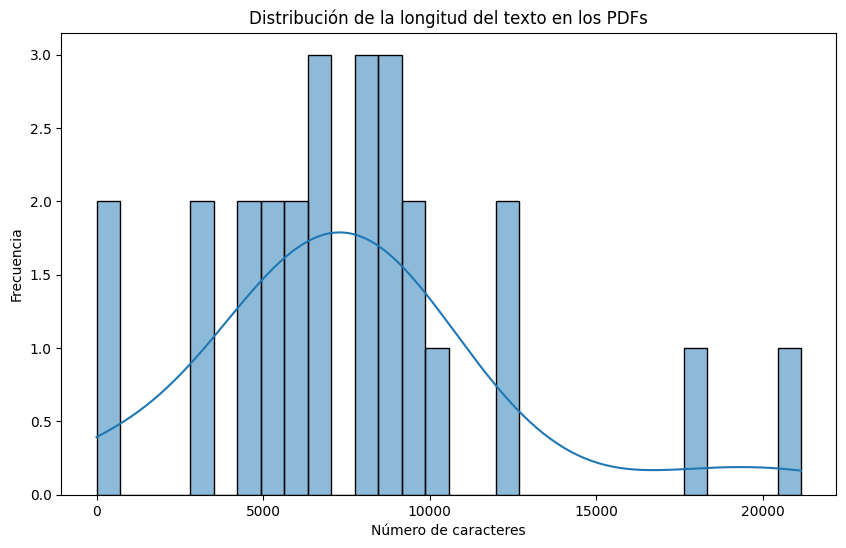

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_caracteres'], bins=30, kde=True)
plt.title("Distribución de la longitud del texto en los PDFs")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.show()


### 2.4. Análisis de Contenido

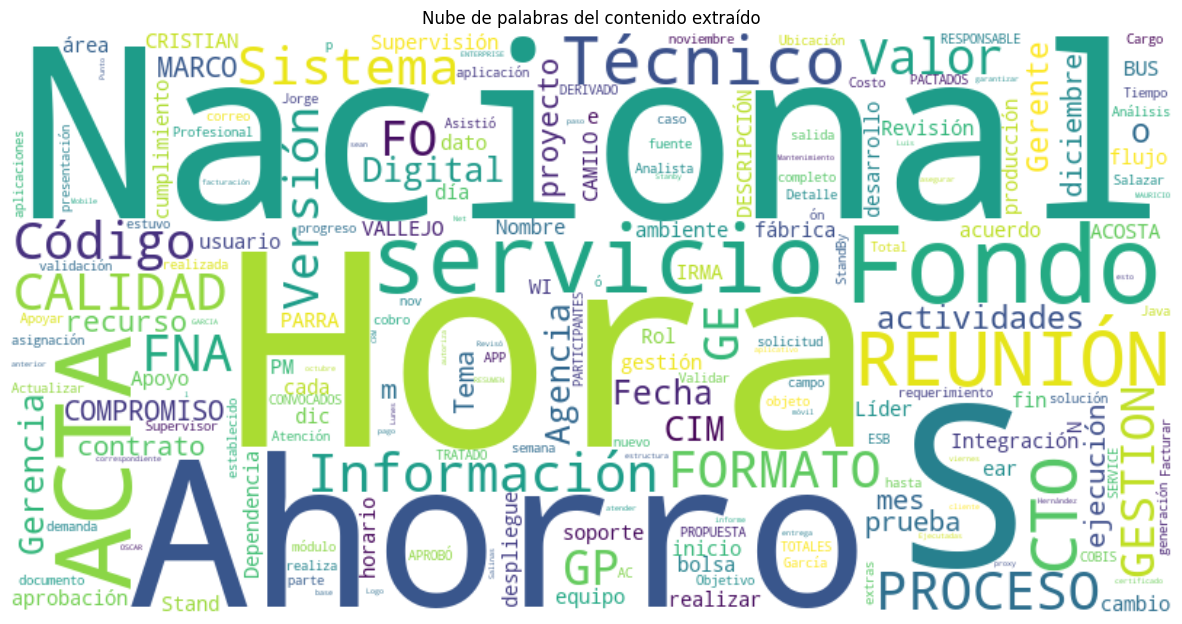

In [9]:
# Definir stopwords en español adicionales
spanish_stopwords = set(STOPWORDS)
# Añadir algunos artículos y otras palabras comunes en español
spanish_stopwords.update([
    "el", "la", "los", "las", "de", "del", "al", "a", "en", "y", "que", "un", "una", "unos", "unas",
    "por", "con", "para", "como", "es", "se", "no", "su", "lo", "más", "pero", "sus", "le", "ha", "me",
    "si", "sin", "sobre", "este", "ya", "entre", "cuando", "todo", "esta", "ser", "son", "dos"
])

# Unir todos los textos extraídos para generar una nube de palabras
all_text = " ".join(df['text'].tolist())

wordcloud = WordCloud(
    width=800,
    height=400, 
    stopwords=spanish_stopwords,
    background_color='white',
    collocations=False 
    ).generate(all_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras del contenido extraído")
plt.show()
